In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
#reading  data
data = pd.read_csv("Salary_Data.csv")

In [3]:
#first 5 observations
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


## Data Cleaning and Preprocessing

In [4]:
#information about data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


- data contains numerical type data.

In [5]:
#shape of dataset
data.shape

(30, 2)

In [6]:
data.isna().sum()

YearsExperience    0
Salary             0
dtype: int64

In [7]:
#renaming columns
data.rename(columns={"YearsExperience":"years_experience","Salary":"salary"},inplace = True)

## statsitical summary of dataset

In [8]:
data.describe()

,years_experience,salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [9]:
data.agg(["var","skew","kurtosis"])

,years_experience,salary
var,8.053609,7.515510e+08
skew,0.379560,3.541197e-01
kurtosis,-1.012212,-1.295421e+00


## EDA

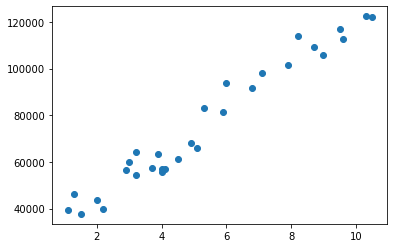

In [10]:
#relationship between 2 columns
plt.scatter(data["years_experience"], data["salary"])

<AxesSubplot:xlabel='years_experience', ylabel='salary'>

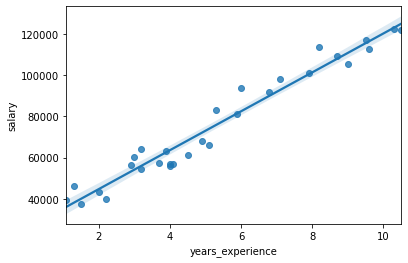

In [11]:
sns.regplot(data["years_experience"],data["salary"])

<AxesSubplot:>

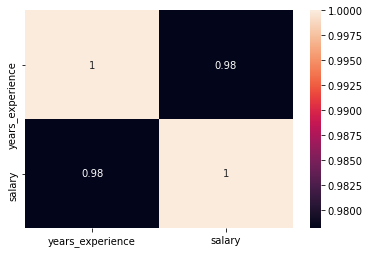

In [12]:
sns.heatmap(data.corr(),annot = True)

### Visualizing the frequency of features

<AxesSubplot:xlabel='salary', ylabel='Density'>

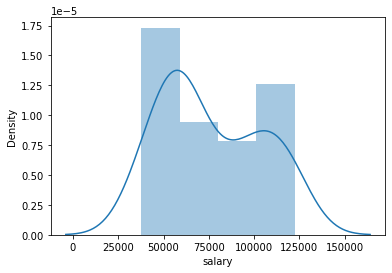

In [13]:
sns.distplot(data["salary"])

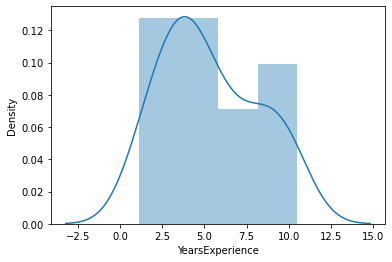

In [14]:
sns.distplot(data["years_experience"])
plt.xlabel("YearsExperience")
plt.show()

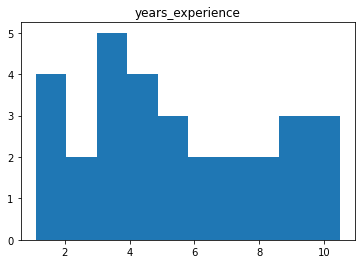

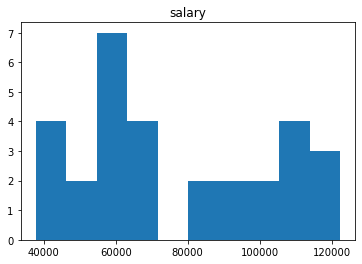

In [15]:
for i in data:
    plt.hist(data[i])
    plt.title(i)
    plt.show()

### Conclusion:

- data in target column "salary" and input column "YearsExperience" is not normally distributed.

### Outliers detection

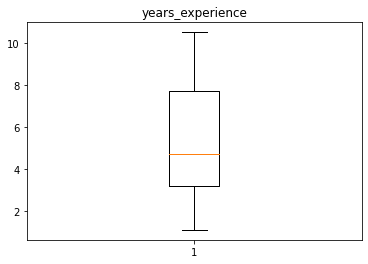

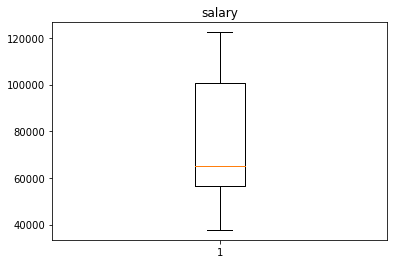

In [16]:
for i in data:
    plt.boxplot(data[i])
    plt.title(i)
    plt.show()

## Creating a Linear Regression Model

In [17]:
import statsmodels.formula.api as smf

In [18]:
#fitting the model and model summary
model = smf.ols("salary~years_experience",data = data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Thu, 08 Sep 2022   Prob (F-statistic):           1.14e-20
Time:                        12:28:04   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
years_experience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
#coefficients
model.params

Intercept           25792.200199
years_experience     9449.962321
dtype: float64

In [20]:
#t-value and p-value
print(model.tvalues,"\n",model.pvalues)

Intercept           11.346940
years_experience    24.950094
dtype: float64 
 Intercept           5.511950e-12
years_experience    1.143068e-20
dtype: float64


In [21]:
# R squared value
(model.rsquared,model.rsquared_adj)

(0.9569566641435086, 0.9554194021486339)

- R squared values are always between (0,1) if the value is near to 1 then it is considered as bestfit but if value is 1 then it considerd as overfit.
- In this case, the r squared value is near to 1.

## Predicting and testing with new points

In [22]:
new_data = pd.Series([1,9.1,10,11,1.1,2.5,4.7])

In [23]:
# creating new testing points dataframe
salary_pred = pd.DataFrame(new_data,columns=["years_experience"])

In [24]:
#predicting data
model.predict(salary_pred)

0     35242.162520
1    111786.857324
2    120291.823413
3    129741.785735
4     36187.158752
5     49417.106002
6     70207.023110
dtype: float64

In [25]:
#residual values
model.resid

0      3155.841248
1      8127.848783
2     -2236.143681
3     -1167.124842
4     -6691.117306
5      3444.909069
6      6007.912837
7     -1587.079627
8      8412.920373
9     -3568.060788
10      570.946748
11    -7798.049484
12    -6635.049484
13    -7456.045717
14    -7206.030645
15    -4159.015574
16    -7958.008038
17     7210.999498
18     -183.977895
19    11448.025873
20     1686.056015
21     5386.067319
22      855.097462
23    10530.108765
24     1424.127605
25    -5259.861092
26     1402.157748
27    -3876.838485
28     -735.812110
29    -3144.804574
dtype: float64

## prediction on test data

In [26]:
y_pred = pd.DataFrame(data["years_experience"])

In [27]:
prediction = model.predict(y_pred)
prediction

0      36187.158752
1      38077.151217
2      39967.143681
3      44692.124842
4      46582.117306
5      53197.090931
6      54142.087163
7      56032.079627
8      56032.079627
9      60757.060788
10     62647.053252
11     63592.049484
12     63592.049484
13     64537.045717
14     68317.030645
15     72097.015574
16     73987.008038
17     75877.000502
18     81546.977895
19     82491.974127
20     90051.943985
21     92886.932681
22    100446.902538
23    103281.891235
24    108006.872395
25    110841.861092
26    115566.842252
27    116511.838485
28    123126.812110
29    125016.804574
dtype: float64

In [28]:
error = data["salary"] - prediction #actual - predicted
error

0      3155.841248
1      8127.848783
2     -2236.143681
3     -1167.124842
4     -6691.117306
5      3444.909069
6      6007.912837
7     -1587.079627
8      8412.920373
9     -3568.060788
10      570.946748
11    -7798.049484
12    -6635.049484
13    -7456.045717
14    -7206.030645
15    -4159.015574
16    -7958.008038
17     7210.999498
18     -183.977895
19    11448.025873
20     1686.056015
21     5386.067319
22      855.097462
23    10530.108765
24     1424.127605
25    -5259.861092
26     1402.157748
27    -3876.838485
28     -735.812110
29    -3144.804574
dtype: float64

## comparing predicted and actual values

In [29]:
df = data.copy()

In [30]:
df["predicted_salary"] = model.fittedvalues
df

,years_experience,salary,predicted_salary
0,1.1,39343.0,36187.158752
1,1.3,46205.0,38077.151217
2,1.5,37731.0,39967.143681
3,2.0,43525.0,44692.124842
4,2.2,39891.0,46582.117306
5,2.9,56642.0,53197.090931
6,3.0,60150.0,54142.087163
7,3.2,54445.0,56032.079627
8,3.2,64445.0,56032.079627
9,3.7,57189.0,60757.060788


## Metrics

In [31]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [32]:
#MSE mean squared error shows how close a regression line to the data points
mse = mean_squared_error(data["salary"],prediction)
mse

31270951.72228097

In [33]:
#RMSE
rmse = sqrt(mse)
rmse

5592.043608760662

# Performing log Transformations

In [34]:
log_data = pd.DataFrame()
log_data["years_experience"] = np.log(data["years_experience"])
log_data["salary"] = data["salary"]
log_data

,years_experience,salary
0,0.095310,39343.0
1,0.262364,46205.0
2,0.405465,37731.0
3,0.693147,43525.0
4,0.788457,39891.0
5,1.064711,56642.0
6,1.098612,60150.0
7,1.163151,54445.0
8,1.163151,64445.0
9,1.308333,57189.0


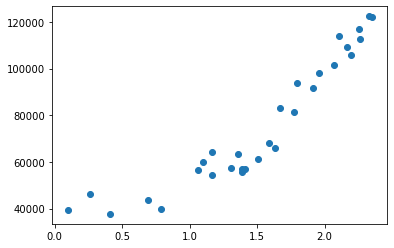

In [35]:
#relationship between 2 columns
plt.scatter(x = log_data["years_experience"], y = log_data["salary"])

<AxesSubplot:xlabel='years_experience', ylabel='salary'>

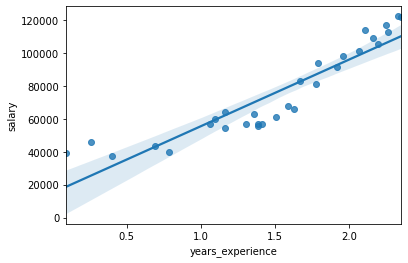

In [36]:
sns.regplot(x = "years_experience", y ="salary", data = log_data)

## Creating model of log_data

In [37]:
model2 = smf.ols("salary~years_experience",data = log_data).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     163.6
Date:                Thu, 08 Sep 2022   Prob (F-statistic):           3.25e-13
Time:                        12:28:05   Log-Likelihood:                -319.77
No. Observations:                  30   AIC:                             643.5
Df Residuals:                      28   BIC:                             646.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         1.493e+04   5156.226      2.895      0.007    4365.921    2.55e+04
years_experience  4.058e+04   3172.453     12.792      0.000    3.41e+04    4.71e+04
==============================================================================
Omnibus:                        1.094   Durbin-Watson:                   0.512
Prob(Omnibus):                  0.579   Jarque-Bera (JB):                0.908
Skew:                           0.156   Prob(JB):                        0.635
Kurtosis:                       2.207   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
(model2.rsquared,model2.rsquared_adj)

(0.8538888828756969, 0.8486706286926861)

In [39]:
(model2.tvalues,"\n", model2.pvalues)

(Intercept            2.895135
 years_experience    12.791989
 dtype: float64,
 '\n',
 Intercept           7.268813e-03
 years_experience    3.250155e-13
 dtype: float64)

In [40]:
model2.params

Intercept           14927.97177
years_experience    40581.98796
dtype: float64

## log model prediction

In [41]:
log_pred = log_data["years_experience"]

In [42]:
log_prediction = model2.predict(log_pred)
log_prediction

0      18795.848339
1      25575.235192
2      31382.551905
3      43057.262306
4      46925.138875
5      58136.050079
6      59511.842441
7      62130.943929
8      62130.943929
9      68022.718504
10     70159.105863
11     71186.552842
12     71186.552842
13     72188.628149
14     75966.422577
15     79422.295729
16     81045.791737
17     82606.829882
18     86959.066704
19     87641.132977
20     92720.502137
21     94472.514696
22     98805.371390
23    100317.918684
24    102719.920751
25    104095.713112
26    106289.868435
27    106714.814600
28    109571.007247
29    110351.454145
dtype: float64

In [43]:
error = log_data["salary"] - log_prediction
error

0     20547.151661
1     20629.764808
2      6348.448095
3       467.737694
4     -7034.138875
5     -1494.050079
6       638.157559
7     -7685.943929
8      2314.056071
9    -10833.718504
10    -6941.105863
11   -15392.552842
12   -14229.552842
13   -15107.628149
14   -14855.422577
15   -11484.295729
16   -15016.791737
17      481.170118
18    -5596.066704
19     6298.867023
20     -982.502137
21     3800.485304
22     2496.628610
23    13494.081316
24     6711.079249
25     1486.286888
26    10679.131565
27     5920.185400
28    12819.992753
29    11520.545855
dtype: float64

In [44]:
#MSE mean squared error shows how close a regression line to the data points
mse = mean_squared_error(log_data["salary"],log_pred)
mse

6502695934.920739

In [45]:
rmse = sqrt(mse)
rmse

80639.29522832364

## Comparison of actual and predicted

In [46]:
df["log_prediction_salary"] = model2.fittedvalues
df

,years_experience,salary,predicted_salary,log_prediction_salary
0,1.1,39343.0,36187.158752,18795.848339
1,1.3,46205.0,38077.151217,25575.235192
2,1.5,37731.0,39967.143681,31382.551905
3,2.0,43525.0,44692.124842,43057.262306
4,2.2,39891.0,46582.117306,46925.138875
5,2.9,56642.0,53197.090931,58136.050079
6,3.0,60150.0,54142.087163,59511.842441
7,3.2,54445.0,56032.079627,62130.943929
8,3.2,64445.0,56032.079627,62130.943929
9,3.7,57189.0,60757.060788,68022.718504
